In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/deepfish/affinity_lcfcn

/content/drive/MyDrive/deepfish/affinity_lcfcn


## 

## Get Started by following these 5 steps
- Step 1: Download the code and the dataset
- Step 2: Install and Import Libraries
- Step 3: Define List of Experiments
- Step 4: Train and Validate
- Step 5: Visualize the Results


### Step 1: Download the code and the dataset

Open pickle file

In [ ]:


# import pickle


# with open('/content/drive/MyDrive/deepfish/affinity_lcfcn/results/score_list.pkl', 'rb') as f:
#     data = pickle.load(f)

# data
# data[-1]

# data[:-5]


## Step 2: Install and Import Libraries

In [ ]:
# !pip install --upgrade --quiet git+https://github.com/haven-ai/haven-ai
# !pip install pydicom
# !pip install kornia

# import tqdm.notebook as tqdm
# import os
# import torch
# import numpy as np
# import warnings
# warnings.filterwarnings('ignore')

# from torch.utils.data import DataLoader

# from haven import haven_examples as he
# from haven import haven_wizard as hw
# from haven import haven_jupyter as hj
# from haven import haven_results as hr
# from haven import haven_utils as hu

# from src import models
# from src import datasets
# from src import utils as ut


In [ ]:
!pip install haven-ai
!pip install kornia
!pip uninstall opencv-python-headless==4.5.5.62 -y
!pip install opencv-python-headless==4.1.2.30
!pip install torchinfo
!pip install timm
!pip install einops==0.3.0

     |████████████████████████████████| 92 kB 860 kB/s 
     |████████████████████████████████| 47.8 MB 128 kB/s 
     |████████████████████████████████| 512 kB 4.3 MB/s 
Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Successfully uninstalled opencv-python-headless-4.5.5.64
     |████████████████████████████████| 21.8 MB 255 kB/s 
     |████████████████████████████████| 431 kB 4.3 MB/s 


In [ ]:
!pip install --upgrade --quiet git+https://github.com/haven-ai/haven-ai

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
import tqdm.notebook as tqdm
import os
import torch
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from torch.utils.data import DataLoader

from haven import haven_examples as he
from haven import haven_wizard as hw
from haven import haven_jupyter as hj
from haven import haven_results as hr
from haven import haven_utils as hu

# from src import models
# from src import datasets
# from src import utils as ut

In [ ]:
from haven import haven_chk as hc
# from haven import haven_results as hr
# from haven import haven_utils as hu
import torch
import torchvision
import tqdm
import pandas as pd
import pprint
import itertools
import os
import pylab as plt
import time
import numpy as np

from src import *
import argparse

from torch.utils.data import sampler
from torch.utils.data.sampler import RandomSampler
from torch.backends import cudnn
from torch.nn import functional as F
from torch.utils.data import DataLoader
# from torchvision import models
from torchinfo import summary

cudnn.benchmark = True

In [ ]:
from src import models
from src import datasets
from src import utils as ut

### Step 3: Define List of Experiments

In [ ]:
# # Define a list of experiments
# exp_list = [{'batch_size': 8,
#           'dataset': {'n_classes': 2, 'name': 'c'},
#           'dataset_size': {'train': 'all', 'val': 'all'},
#           'lr': 0.00001,
#           'max_epoch': 101,
#           'model': {'base': 'fcn8_vgg16',
#                     'loss': 'cons_point_loss',
#                     'n_channels': 3,
#                     'n_classes': 1,
#                     'name': 'semseg'},
#           'num_channels': 1,
#           'optimizer': 'adam'}]

In [ ]:
# !python3 '/content/drive/MyDrive/deepfish/affinity_lcfcn/trainval.py' -e weakly_JCUfish_aff -sb '/content/seg_checkpoint/' -d '/content/drive/MyDrive/deepfish/Dataset/DeepFish/' -r 1 -nw 2

For Results 1:

In [ ]:
# # # Define a list of experiments
# exp_list = [{'batch_size': 1,
#           'dataset': {'n_classes': 2, 'name': 'JcuFish'},
#           'dataset_size': {'train': 'all', 'val': 'all'},
#           'lr': 0.00001,
#           'max_epoch': 101,
#           'model': {'base': 'fcn8_wide_resnet50',
#                     'loss': 'cross_entropy',
#                     'n_channels': 3,
#                     'n_classes': 2,
#                     'name': 'semseg',
#                     'with_PASPP': False},
#           'num_channels': 1,
#           'optimizer': 'adam'}]

Results2

In [ ]:
# # # Define a list of experiments
# exp_list = [{'batch_size': 1,
#           'dataset': {'n_classes': 2, 'name': 'JcuFish'},
#           'dataset_size': {'train': 'all', 'val': 'all'},
#           'lr': 0.00001,
#           'max_epoch': 31,
#           'model': {'base': 'fcn8_vgg16',
#                     'loss': 'cross_entropy',
#                     'n_channels': 3,
#                     'n_classes': 2,
#                     'name': 'semseg',
#                     'with_PASPP': True},
#           'num_channels': 1,
#           'optimizer': 'adam'}]

Atempt

In [ ]:

# # Define a list of experiments
# exp_list = [{'batch_size': 1,
#           'dataset': {'n_classes': 2, 'name': 'JcuFish'},
#           'dataset_size': {'train': 'all', 'val': 'all'},
#           'lr': 1e-5,
#           'max_epoch': 101,
#           'model': {'base': 'fcn8_vgg16',
#                     'loss': 'cross_entropy',
#                     'n_channels': 3,
#                     'n_classes': 2,
#                     'name': 'semseg',
#                     'with_PASPP': False},
#           'num_channels': 1,
#           'optimizer': 'adam'}]



In [ ]:
# # # Define a list of experiments
# exp_list = [{'batch_size': 1,
#           'dataset': {'n_classes': 2, 'name': 'SumFish'},
#           'dataset_size': {'train': 'all', 'val': 'all'},
#           'lr': 1e-4,
#           'max_epoch': 31,
#           'model': {'base': 'fcn8_vgg16',
#                     'loss': 'cons_point_loss',
#                     'n_channels': 3,
#                     'n_classes': 2,
#                     'name': 'semseg'},
#           'num_channels': 1,
#           'optimizer': 'adam'}]

In [ ]:

# # Define a list of experiments
# exp_list = [{'batch_size': 1,
#           'dataset': {'n_classes': 2, 'name': 'JcuFish'},
#           'dataset_size': {'train': 'all', 'val': 'all'},
#           'lr': 1e-5,
#           'max_epoch': 101,
#           'model': {'base': 'fcn8_vgg16',
#                     'loss': 'focal_cross_entropy',
#                     'n_channels': 3,
#                     'n_classes': 2,
#                     'name': 'semseg',
#                     'with_PASPP': False},
#           'num_channels': 1,
#           'optimizer': 'adam'}]



In [ ]:

'''Next'''#not checked yet

# # # Define a list of experiments
# exp_list = [{'batch_size': 1,
#           'dataset': {'n_classes': 2, 'name': 'JcuFish'},
#           'dataset_size': {'train': 'all', 'val': 'all'},
#           'lr': 0.00001,
#           'max_epoch': 101,
#           'model': {'base': 'fcn8_wide_resnet50_modified',
#                     'loss': 'focal_cross_entropy',
#                     'n_channels': 3,
#                     'n_classes': 2,
#                     'name': 'semseg',
#                     'with_WASP': True},
#           'num_channels': 1,
#           'optimizer': 'adam'}]

'Next'

In [ ]:
# # Define a list of experiments
# #worked ok
# exp_list = [{'batch_size': 1,
#           'dataset': {'n_classes': 2, 'name': 'JcuFish'},
#           'dataset_size': {'train': 'all', 'val': 'all'},
#           'lr': 0.00001,
#           'max_epoch': 101,
#           'model': {'base': 'fcn8_wide_resnet50_modified',
#                     'loss': 'cross_entropy',
#                     'n_channels': 3,
#                     'n_classes': 2,
#                     'name': 'semseg',
#                     'with_WASP': True},
#           'num_channels': 1,
#           'optimizer': 'adam'}]

In [ ]:

#'''Experiment 1: ok, '''
#
# # # Define a list of experiments
# exp_list = [{'batch_size': 1,
#           'dataset': {'n_classes': 2, 'name': 'JcuFish'},
#           'dataset_size': {'train': 'all', 'val': 'all'},
#           'lr': 0.00001,
#           'max_epoch': 101,
#           'model': {'base': 'fcn8_wide_resnet50_modified',
#                     'loss': 'cross_entropy_LIF','with_affinity': True,
#                     'n_channels': 3,
#                     'n_classes': 2,
#                     'name': 'semseg',
#                     'with_WASP': True},
#           'num_channels': 1,
#           'optimizer': 'adam'}]

In [ ]:

# '''Experiment 2'''
# folder_store='Results_Compare/results_CE'
# # # Define a list of experiments
# exp_list = [{'batch_size': 1,
#           'dataset': {'n_classes': 2, 'name': 'JcuFish'},
#           'dataset_size': {'train': 'all', 'val': 'all'},
#           'lr': 0.00001,
#           'max_epoch': 51,
#           'model': {'base': 'fcn8_wide_resnet50_modified',
#                     'loss': 'cross_entropy','with_affinity': True,
#                     'n_channels': 3,
#                     'n_classes': 2,
#                     'name': 'semseg',
#                     'with_WASP': True},
#           'num_channels': 1,
#           'optimizer': 'adam'}]

In [ ]:

#Next: '''Experiment 4'''

folder_store1="results_4_fcn_resnet_CE"
folder_store='/content/drive/MyDrive/My_run/Results_Compare/'+folder_store1


import os
# data_path1='/content/drive/MyDrive/Pytorch_ML/Lec1_tuto1/'
# if not os.path.isdir(data_path1+"/data_temp5/"):
#     os.mkdir(data_path1+"/data_temp5/")
if not os.path.isdir(folder_store):
    os.mkdir(folder_store)


use_resume=1
# # Define a list of experiments
exp_list = [{'batch_size': 1,
          'dataset': {'n_classes': 2, 'name': 'JcuFish'},
          'dataset_size': {'train': 'all', 'val': 'all'},
          'lr': 0.00001,
          'max_epoch': 51,
          'model': {'base': 'fcn8_wide_resnet50',
                    'loss': 'cross_entropy','with_affinity': True,
                    'n_channels': 3,
                    'n_classes': 2,
                    'name': 'semseg',
                    'with_PASSP': False},
          'num_channels': 1,
          'optimizer': 'adam'}]

### Prepare data

In [ ]:
'''
from skimage.io import imread,imsave
import matplotlib.pyplot as plt
image_path='/content/drive/MyDrive/deepfish/Dataset/DeepFish/train_val/images/d_r_31_.jpg'
image_raw = imread(image_path)
plt.imshow(image_raw)
# image_path='/content/drive/MyDrive/deepfish/Dataset/DeepFish/train_val/masks/d_r_31_.bmp'
# mask = imread(image_path)
# plt.imshow(mask)
'''

"\nfrom skimage.io import imread,imsave\nimport matplotlib.pyplot as plt\nimage_path='/content/drive/MyDrive/deepfish/Dataset/DeepFish/train_val/images/d_r_31_.jpg'\nimage_raw = imread(image_path)\nplt.imshow(image_raw)\n# image_path='/content/drive/MyDrive/deepfish/Dataset/DeepFish/train_val/masks/d_r_31_.bmp'\n# mask = imread(image_path)\n# plt.imshow(mask)\n"

In [ ]:
   '''
   
    imw, imh = mask.shape[0], mask.shape[1]
    # Human = np.zeros((imw, imh))
    # Robot = np.zeros((imw, imh))
    Fish = np.zeros((imw, imh))
    # Reef = np.zeros((imw, imh))
    # Wreck = np.zeros((imw, imh))
    for i in range(imw):
        for j in range(imh):
          if (mask[i,j,0]==255 and mask[i,j,1]==255 and mask[i,j,2]==0):
            Fish[i, j] = 1
          else: pass  

                   # if (mask[i,j,0]==0 and mask[i,j,1]==0 and mask[i,j,2]==255):
            #     Human[i, j] = 1 
            # elif (mask[i,j,0]==255 and mask[i,j,1]==0 and mask[i,j,2]==0):
            #     Robot[i, j] = 1  
          # if (mask[i,j,0]==255 and mask[i,j,1]==255 and mask[i,j,2]==0):
          #       Fish[i, j] = 1  
            # elif (mask[i,j,0]==255 and mask[i,j,1]==0 and mask[i,j,2]==1):
            #     Reef[i, j] = 1  
            # elif (mask[i,j,0]==0 and mask[i,j,1]==255 and mask[i,j,2]==255):
            #     Wreck[i, j] = 1  
          # else: pass
          # plt.imshow(Fish,cmap='gray')

          '''

"\n\n imw, imh = mask.shape[0], mask.shape[1]\n # Human = np.zeros((imw, imh))\n # Robot = np.zeros((imw, imh))\n Fish = np.zeros((imw, imh))\n # Reef = np.zeros((imw, imh))\n # Wreck = np.zeros((imw, imh))\n for i in range(imw):\n     for j in range(imh):\n       if (mask[i,j,0]==255 and mask[i,j,1]==255 and mask[i,j,2]==0):\n         Fish[i, j] = 1\n       else: pass  \n\n                # if (mask[i,j,0]==0 and mask[i,j,1]==0 and mask[i,j,2]==255):\n         #     Human[i, j] = 1 \n         # elif (mask[i,j,0]==255 and mask[i,j,1]==0 and mask[i,j,2]==0):\n         #     Robot[i, j] = 1  \n       # if (mask[i,j,0]==255 and mask[i,j,1]==255 and mask[i,j,2]==0):\n       #       Fish[i, j] = 1  \n         # elif (mask[i,j,0]==255 and mask[i,j,1]==0 and mask[i,j,2]==1):\n         #     Reef[i, j] = 1  \n         # elif (mask[i,j,0]==0 and mask[i,j,1]==255 and mask[i,j,2]==255):\n         #     Wreck[i, j] = 1  \n       # else: pass\n       # plt.imshow(Fish,cmap='gray')\n\n       "

In [ ]:
from PIL import Image
from skimage.io import imread,imsave
import cv2
def get_data(train_path, mask_path,save_img_path,save_mask_path, size=(256, 256)):
    from tqdm import tqdm
    images, masks = [], []
    for idx in tqdm(range(len(train_path))):
        # image1 = Image.open(train_path[idx])
        # image = Image.open(train_path[idx]).resize((size[1], size[0]))
        # mask = Image.open(mask_path[idx]).resize((size[1], size[0]), Image.NEAREST)
        mask1 = Image.open(mask_path[idx])
        mask1.save('/content/temp.bmp')
        mask1=imread('/content/temp.bmp')
        # mask1 = np.asarray(mask, dtype=np.uint8)
        imw, imh = mask1.shape[0], mask1.shape[1]
        # imw, imh = mask.size[0], mask.size[1]
        Fish = np.zeros((imw, imh))
        for i in range(imw):
          for j in range(imh):
            if (mask1[i,j,0]==255 and mask1[i,j,1]==255 and mask1[i,j,2]==0):
              # Fish[i,j] = 1
              Fish[i,j] = 255
            else: pass 
        # cv2.imwrite(save_mask_path+'temp.png',Fish)
        # cv2.imwrite('/content/temp.bmp',Fish)
        # temp_img = Image.open('/content/temp.bmp')
        # temp_img.save(save_mask_path+str(idx)+'.bmp')
        imsave(save_mask_path+str(idx)+'.bmp',Fish)
        # mask = np.asarray(mask, dtype=np.uint8)
        # mask.save(save_mask_path[idx])
        # images.append(image)
        # masks.append(mask)
    # return np.stack(images), np.stack(masks)

In [ ]:
# import glob 
# train_path = glob.glob("/content/drive/MyDrive/deepfish/Dataset/DeepFish/train_val_org/images/*.jpg")
# save_img_path="/content/drive/MyDrive/deepfish/Dataset/DeepFish/train_val/images/"

# mask_path= glob.glob("/content/drive/MyDrive/deepfish/Dataset/DeepFish/train_val_org/masks/*.bmp")
# save_mask_path="/content/drive/MyDrive/deepfish/Dataset/DeepFish/train_val/masks/"

# get_data(train_path, mask_path,save_img_path,save_mask_path, size=(256, 256))

# train_path = glob.glob("/content/drive/MyDrive/deepfish/Dataset/DeepFish/TEST_org/images/*.jpg")
# save_img_path="/content/drive/MyDrive/deepfish/Dataset/DeepFish/TEST/images/"

# mask_path= glob.glob("/content/drive/MyDrive/deepfish/Dataset/DeepFish/TEST_org/masks/*.bmp")
# save_mask_path="/content/drive/MyDrive/deepfish/Dataset/DeepFish/TEST/masks/"

# get_data(train_path, mask_path,save_img_path,save_mask_path, size=(256, 256))


In [ ]:
# idx=31
# ask_path= glob.glob("/content/drive/MyDrive/deepfish/Dataset/DeepFish/train_val/masks/*.bmp")
# mask1 = Image.open(mask_path[idx])
# plt.imshow(mask1)
# mask1.save('/content/temp.bmp')

In [ ]:
# idx=31
# ask_path= glob.glob("/content/drive/MyDrive/deepfish/Dataset/DeepFish/Segmentation/masks/valid/*.png")
# mask1 = Image.open(mask_path[idx])
# plt.imshow(mask1)
# mask1.save('/content/temp.bmp')
# # mask1.max()
# mask1.sum()

In [ ]:
# idx=31
# ask_path= glob.glob("/content/drive/MyDrive/deepfish/Dataset/DeepFish/Segmentation/masks/empty/*.png")
# mask1 = Image.open(mask_path[idx])
# plt.imshow(mask1)
# mask1.save('/content/temp.bmp')
# mask1.max()
# mask1.sum()

In [ ]:
# imw, imh = mask1.shape[0], mask1.shape[1]
# # imw, imh = mask.size[0], mask.size[1]
# Fish = np.zeros((imw, imh))
# for i in range(imw):
#   for j in range(imh):
#     if (mask1[i,j,0]==255 and mask1[i,j,1]==255 and mask1[i,j,2]==0):
#       Fish[i,j] = 255
#     else: pass 

# plt.imshow(Fish,cmap='gray')    
# mask3=imread('/content/temp.bmp')
# plt.imshow(mask3) 
# imsave(save_mask_path+str(idx)+'.bmp',mask3)

### Step 4: Train and Validate

In [ ]:
# savedir='/content/drive/MyDrive/deepfish/affinity_lcfcn/'+folder_store

In [ ]:
# Define Training Validation Procedure 
def trainval(exp_dict, savedir, args):
  # def trainval(exp_dict, savedir, datadir, reset=False, num_workers=0):
    """
    exp_dict: dictionary defining the hyperparameters of the experiment
    savedir: the directory where the experiment will be saved
    args: arguments passed through the command line
    """
        # bookkeepting stuff
    # ==================
    pprint.pprint(exp_dict)
    exp_id = hu.hash_dict(exp_dict) #
    os.makedirs(savedir, exist_ok=True)
    savedir = os.path.join(savedir, exp_id)
    os.makedirs(savedir, exist_ok=True)
    hu.save_json(os.path.join(savedir, "exp_dict.json"), exp_dict)
    print("Experiment saved in %s" % savedir)


    # set seed
    # ==================
    seed = 42
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    print('-----done-torch-cuda-seed-----')
    # savedir='/content/drive/MyDrive/deepfish/affinity_lcfcn/Results_Compare/results_CE'
    # savedir='/content/drive/MyDrive/deepfish/affinity_lcfcn/'+folder_store
    savedir=folder_store

    # ==================
    # Dataset
    # datadir = 'dataset'
    # datadir = '/content/drive/MyDrive/deepfish/Dataset/DeepFish/'
    datadir = '/content/drive/MyDrive/deepfish/Dataset/DeepFish'
    num_workers=0
    # ==================
    # train set
    train_set = datasets.get_dataset(dataset_dict=exp_dict["dataset"],
                                     split="train",
                                     datadir=datadir,
                                     exp_dict=exp_dict,
                                     dataset_size=exp_dict['dataset_size'])

    # val set
    val_set = datasets.get_dataset(dataset_dict=exp_dict["dataset"],
                                   split="val",
                                   datadir=datadir,
                                   exp_dict=exp_dict,
                                   dataset_size=exp_dict['dataset_size'])

    # test set
    test_set = datasets.get_dataset(dataset_dict=exp_dict["dataset"],
                                   split="test",
                                   datadir=datadir,
                                   exp_dict=exp_dict,
                                   dataset_size=exp_dict['dataset_size'])

    # # val_sampler = torch.utils.data.SequentialSampler(val_set)
    # val_loader = DataLoader(val_set,
    #                         # sampler=val_sampler,
    #                         batch_size=1,
    #                         collate_fn=ut.collate_fn,
    #                         num_workers=num_workers)

    # test_loader = DataLoader(test_set,
    #                         # sampler=val_sampler,
    #                         batch_size=1,
    #                         collate_fn=ut.collate_fn,
    #                         num_workers=num_workers)
    # Dataset Loaders
    # ==================
    train_sampler = torch.utils.data.RandomSampler(
                                train_set, replacement=True, 
                                num_samples=2*len(test_set))

    train_loader = DataLoader(train_set,
                            sampler=train_sampler,
                            collate_fn=ut.collate_fn,
                            batch_size=exp_dict["batch_size"], 
                            drop_last=True, 
                            num_workers=0)
    
    val_loader = DataLoader(val_set,
                            # sampler=val_sampler,
                            batch_size=1,
                            collate_fn=ut.collate_fn,
                            num_workers=0)
    test_loader = DataLoader(test_set,
                            # sampler=val_sampler,
                            batch_size=1,
                            collate_fn=ut.collate_fn,
                            num_workers=0)

    print('-----done-loader-dts-----')                        

    # Model
    # ==================
    # model = models.get_model(model_dict=exp_dict['model'],
    #                          exp_dict=exp_dict,
    #                          train_set=train_set, device='cpu')
    model = models.get_model(model_dict=exp_dict['model'],
                             exp_dict=exp_dict,
                             train_set=train_set).cuda()

    # model.opt = optimizers.get_optim(exp_dict['opt'], model)
    model_path = os.path.join(savedir, "model.pth")
    score_list_path = os.path.join(savedir, "score_list.pkl")   
    
    if (os.path.exists(score_list_path))&(use_resume==1):
      # resume experiment
      model.load_state_dict(hu.torch_load(model_path))
      score_list = hu.load_pkl(score_list_path)
      s_epoch = score_list[-1]['epoch'] + 1
    else:
      # restart experiment
      score_list = []
      s_epoch = 0



    # Resume or initialize checkpoint
    cm = hw.CheckpointManager(savedir, verbose=False)

    model_state_dict = cm.load_model()
    # if model_state_dict is not None:
    #     model.set_state_dict(model_state_dict)
        
    # Validate the model
    # val_dict = model.val_on_loader(val_loader,
    #                                savedir_images=os.path.join(savedir, "images"),
    #                                n_images=3)
    val_dict = model.val_on_loader(val_loader,
                                   savedir_images=os.path.join(savedir, "images"),
                                   n_images=90)
    # Add main loop
    '''
    #worked:
    for epoch in tqdm.tqdm(range(cm.get_epoch(), 10)):
        # Train the model
        train_dict = model.train_on_loader(train_loader)

        # Validate the model
        # val_dict = model.val_on_loader(val_loader,
        #                               savedir_images=os.path.join(savedir, "images"),
        #                               n_images=3)
        val_dict = model.val_on_loader(val_loader,
                                      savedir_images=os.path.join(savedir, "images"),
                                      n_images=3)
        # Get metrics
        score_dict = {'epoch':epoch, 
                      'val_score': val_dict["val_score"], 
                      'loss':train_dict['train_loss']}

        # Save Metrics and Model
        cm.log_metrics(score_dict)
        # cm.save_torch("model.pth", model.get_state_dict())

        # Report & Save
        score_df = pd.DataFrame(score_list)
        score_df.to_csv(os.path.join(savedir, "score_df.csv"))
        print("\n", score_df.tail(), "\n")
        hu.torch_save(model_path, model.get_state_dict())
        hu.save_pkl(score_list_path, score_list)
        print("Checkpoint Saved: %s" % savedir)

    print("Experiment completed")
'''
# Modified version:
    model.waiting = 0
    model.val_score_best = -np.inf
    score_list = []
    s_epoch=0
    for e in range(s_epoch, exp_dict['max_epoch']):
        # Validate only at the start of each cycle
        score_dict = {}
        # Train the model
        train_dict = model.train_on_loader(train_loader)
        # Validate the model
        val_dict = model.val_on_loader(val_loader, savedir_images=os.path.join(savedir, "images"), n_images=90)
        for k in val_dict:
            if "val_" in k:
                score_dict[k] = val_dict[k]

        # Get new score_dict
        score_dict.update(train_dict)
        score_dict["epoch"] = e
        score_dict["waiting"] = model.waiting
        score_dict.update(val_dict)
        model.waiting += 1

        # Add to score_list and save checkpoint
        score_list += [score_dict]

        # Save Best Checkpoint
        score_df = pd.DataFrame(score_list)

        test_dict = model.val_on_loader(test_loader,
                                    savedir_images=os.path.join(savedir, "images"),
                                    n_images=90)  
        score_dict.update(test_dict)

        hu.save_pkl(os.path.join(savedir, "score_list.pkl"), score_list)

        score_df.to_csv(os.path.join(savedir, "score_df.csv"))
        # hu.torch_save(os.path.join(savedir, "model.pth"),model.get_state_dict())

        if score_dict["val_score"] >= model.val_score_best:
            test_dict = model.val_on_loader(test_loader,
                                    savedir_images=os.path.join(savedir, "images"),
                                    n_images=110)  
            score_dict.update(test_dict)

            hu.save_pkl(os.path.join(savedir, "score_list_best.pkl"), score_list)
            score_df.to_csv(os.path.join(savedir, "score_best_df.csv"))
            hu.torch_save(os.path.join(savedir, "model_best.pth"),model.get_state_dict())
            model.waiting = 0
            model.val_score_best = score_dict["val_score"]
            print("Saved Best: %s" % savedir)

        # Report & Save
        score_df = pd.DataFrame(score_list)
        score_df.to_csv(os.path.join(savedir, "score_df1.csv"))
        print("\n", score_df.tail(), "\n")
        # hu.torch_save(model_path, model.get_state_dict())
        hu.torch_save(os.path.join(savedir, "model.pth"),model.get_state_dict())
        hu.save_pkl(score_list_path, score_list)
        print("Checkpoint Saved: %s" % savedir)
        # Save Metrics and Model
        cm.log_metrics(score_dict)
        # cm.save_torch("model.pth", model.get_state_dict())
    print('Experiment completed et epoch %d' % e)
    hu.torch_save(os.path.join(savedir, "model.pth"),model.get_state_dict())



if __name__ == '__main__':
    # Launch experiments using the trainval function
    hw.run_wizard(func=trainval, exp_list=exp_list, 
                  savedir_base=folder_store+'/tmp',
                  reset=True)    
    # hw.run_wizard(func=trainval, exp_list=exp_list, 
    #               savedir_base='Results_Compare/results_CE/tmp',
    #               reset=True)
    # hw.run_wizard(func=trainval, exp_list=exp_list, 
    #               savedir='results/tmp',
    #               reset=True)    

# visualize experiments using dashboard
# rm = hr.ResultManager(exp_list=None, savedir_base='results/experiments', 
#                       job_scheduler=None,
#                       verbose=0)


# hw.run_wizard(func=trainval, exp_list=exp_list,savedir_base='results/tmp',reset=True)
# rm = hr.ResultManager(exp_list=exp_list, savedir='results/experiments', 
#                       job_scheduler=None,
#                       verbose=0)
hw.run_wizard(func=trainval, exp_list=exp_list,savedir_base=folder_store+'/tmp',reset=True)
rm = hr.ResultManager(exp_list=exp_list, savedir=folder_store+'/experiments', 
                      job_scheduler=None,
                      verbose=0)

# pick specific dataset
filterby_list = None
legend_list = ['model.name', 'model.loss']
title_list = ['dataset.name']
y_metrics = ['train_loss', 'test_iou']
x_metric = 'epoch'
hj.get_dashboard(rm, vars(), wide_display=True, enable_datatables=True)    


Running 1 experiments

******
Haven: 0.6.7
Exp id: 21e23eb638564677137d610fcd0e6b39

Hyperparameters:
----------------
{'batch_size': 1,
 'dataset': {'n_classes': 2, 'name': 'JcuFish'},
 'dataset_size': {'train': 'all', 'val': 'all'},
 'lr': 1e-05,
 'max_epoch': 51,
 'model': {'base': 'fcn8_wide_resnet50',
           'loss': 'cross_entropy',
           'n_channels': 3,
           'n_classes': 2,
           'name': 'semseg',
           'with_PASSP': False,
           'with_affinity': True},
 'num_channels': 1,
 'optimizer': 'adam'}

Save directory: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE/tmp/21e23eb638564677137d610fcd0e6b39
{'batch_size': 1,
 'dataset': {'n_classes': 2, 'name': 'JcuFish'},
 'dataset_size': {'train': 'all', 'val': 'all'},
 'lr': 1e-05,
 'max_epoch': 51,
 'model': {'base': 'fcn8_wide_resnet50',
           'loss': 'cross_entropy',
           'n_channels': 3,
           'n_classes': 2,
           'name': 'semseg',
           'with_PASSP': Fals

Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth


  0%|          | 0.00/132M [00:00<?, ?B/s]

100%|██████████| 186/186 [02:11<00:00,  1.41it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
0    0.59939    0.983557    0.215224  0.419355   0.16129     0.06947      0   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
0        0    0.625555     0.984484     0.266627  0.424731   0.151882   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE


100%|██████████| 186/186 [02:11<00:00,  1.41it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
0   0.599390    0.983557    0.215224  0.419355  0.161290    0.069470      0   
1   0.869646    0.994126    0.745166  0.137097  0.074597    0.019451      1   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
0        0    0.625555     0.984484     0.266627  0.424731   0.151882  
1        0    0.873161     0.994229     0.752094  0.139785   0.075269   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE


100%|██████████| 186/186 [02:11<00:00,  1.41it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
0   0.599390    0.983557    0.215224  0.419355  0.161290    0.069470      0   
1   0.869646    0.994126    0.745166  0.137097  0.074597    0.019451      1   
2   0.894895    0.995111    0.794678  0.096774  0.056452    0.009326      2   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
0        0    0.625555     0.984484     0.266627  0.424731   0.151882  
1        0    0.873161     0.994229     0.752094  0.139785   0.075269  
2        0    0.908816     0.995791     0.821842  0.107527   0.059140   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE


100%|██████████| 186/186 [02:12<00:00,  1.40it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
0   0.599390    0.983557    0.215224  0.419355  0.161290    0.069470      0   
1   0.869646    0.994126    0.745166  0.137097  0.074597    0.019451      1   
2   0.894895    0.995111    0.794678  0.096774  0.056452    0.009326      2   
3   0.913689    0.996147    0.831231  0.096774  0.072581    0.006980      3   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
0        0    0.625555     0.984484     0.266627  0.424731   0.151882  
1        0    0.873161     0.994229     0.752094  0.139785   0.075269  
2        0    0.908816     0.995791     0.821842  0.107527   0.059140  
3        0    0.932307     0.997000     0.867614  0.086022   0.053763   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE


100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
0   0.599390    0.983557    0.215224  0.419355  0.161290    0.069470      0   
1   0.869646    0.994126    0.745166  0.137097  0.074597    0.019451      1   
2   0.894895    0.995111    0.794678  0.096774  0.056452    0.009326      2   
3   0.913689    0.996147    0.831231  0.096774  0.072581    0.006980      3   
4   0.890289    0.995342    0.785236  0.129032  0.060484    0.005923      4   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
0        0    0.625555     0.984484     0.266627  0.424731   0.151882  
1        0    0.873161     0.994229     0.752094  0.139785   0.075269  
2        0    0.908816     0.995791     0.821842  0.107527   0.059140  
3        0    0.932307     0.997000     0.867614  0.086022   0.053763  
4        0    0.903490     0.995834     0.811145  0.118280   0.061828   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE


100%|██████████| 186/186 [02:12<00:00,  1.41it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
1   0.869646    0.994126    0.745166  0.137097  0.074597    0.019451      1   
2   0.894895    0.995111    0.794678  0.096774  0.056452    0.009326      2   
3   0.913689    0.996147    0.831231  0.096774  0.072581    0.006980      3   
4   0.890289    0.995342    0.785236  0.129032  0.060484    0.005923      4   
5   0.922324    0.996650    0.847999  0.072581  0.042339    0.004567      5   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
1        0    0.873161     0.994229     0.752094  0.139785   0.075269  
2        0    0.908816     0.995791     0.821842  0.107527   0.059140  
3        0    0.932307     0.997000     0.867614  0.086022   0.053763  
4        0    0.903490     0.995834     0.811145  0.118280   0.061828  
5        1    0.937011     0.997263     0.876759  0.091398   0.041667   

Checkpo

100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
2   0.894895    0.995111    0.794678  0.096774  0.056452    0.009326      2   
3   0.913689    0.996147    0.831231  0.096774  0.072581    0.006980      3   
4   0.890289    0.995342    0.785236  0.129032  0.060484    0.005923      4   
5   0.922324    0.996650    0.847999  0.072581  0.042339    0.004567      5   
6   0.920345    0.996504    0.844186  0.153226  0.062500    0.004349      6   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
2        0    0.908816     0.995791     0.821842  0.107527   0.059140  
3        0    0.932307     0.997000     0.867614  0.086022   0.053763  
4        0    0.903490     0.995834     0.811145  0.118280   0.061828  
5        1    0.937011     0.997263     0.876759  0.091398   0.041667  
6        0    0.938726     0.997299     0.880152  0.059140   0.030914   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE


100%|██████████| 186/186 [02:11<00:00,  1.41it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
3   0.913689    0.996147    0.831231  0.096774  0.072581    0.006980      3   
4   0.890289    0.995342    0.785236  0.129032  0.060484    0.005923      4   
5   0.922324    0.996650    0.847999  0.072581  0.042339    0.004567      5   
6   0.920345    0.996504    0.844186  0.153226  0.062500    0.004349      6   
7   0.927497    0.996859    0.858134  0.080645  0.048387    0.003715      7   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
3        0    0.932307     0.997000     0.867614  0.086022   0.053763  
4        0    0.903490     0.995834     0.811145  0.118280   0.061828  
5        1    0.937011     0.997263     0.876759  0.091398   0.041667  
6        0    0.938726     0.997299     0.880152  0.059140   0.030914  
7        1    0.942605     0.997518     0.887691  0.102151   0.041667   

Checkpo

100%|██████████| 186/186 [02:11<00:00,  1.42it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
4   0.890289    0.995342    0.785236  0.129032  0.060484    0.005923      4   
5   0.922324    0.996650    0.847999  0.072581  0.042339    0.004567      5   
6   0.920345    0.996504    0.844186  0.153226  0.062500    0.004349      6   
7   0.927497    0.996859    0.858134  0.080645  0.048387    0.003715      7   
8   0.931369    0.996941    0.865797  0.120968  0.058468    0.003157      8   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
4        0    0.903490     0.995834     0.811145  0.118280   0.061828  
5        1    0.937011     0.997263     0.876759  0.091398   0.041667  
6        0    0.938726     0.997299     0.880152  0.059140   0.030914  
7        1    0.942605     0.997518     0.887691  0.102151   0.041667  
8        0    0.942210     0.997433     0.886987  0.091398   0.038978   

Checkpo

100%|██████████| 186/186 [02:12<00:00,  1.40it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
5   0.922324    0.996650    0.847999  0.072581  0.042339    0.004567      5   
6   0.920345    0.996504    0.844186  0.153226  0.062500    0.004349      6   
7   0.927497    0.996859    0.858134  0.080645  0.048387    0.003715      7   
8   0.931369    0.996941    0.865797  0.120968  0.058468    0.003157      8   
9   0.932486    0.997093    0.867878  0.112903  0.056452    0.003380      9   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
5        1    0.937011     0.997263     0.876759  0.091398   0.041667  
6        0    0.938726     0.997299     0.880152  0.059140   0.030914  
7        1    0.942605     0.997518     0.887691  0.102151   0.041667  
8        0    0.942210     0.997433     0.886987  0.091398   0.038978  
9        0    0.945444     0.997647     0.893242  0.134409   0.047043   

Checkpo

100%|██████████| 186/186 [02:12<00:00,  1.40it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
6    0.920345    0.996504    0.844186  0.153226  0.062500    0.004349      6   
7    0.927497    0.996859    0.858134  0.080645  0.048387    0.003715      7   
8    0.931369    0.996941    0.865797  0.120968  0.058468    0.003157      8   
9    0.932486    0.997093    0.867878  0.112903  0.056452    0.003380      9   
10   0.934688    0.997173    0.872204  0.104839  0.046371    0.002878     10   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
6         0    0.938726     0.997299     0.880152  0.059140   0.030914  
7         1    0.942605     0.997518     0.887691  0.102151   0.041667  
8         0    0.942210     0.997433     0.886987  0.091398   0.038978  
9         0    0.945444     0.997647     0.893242  0.134409   0.047043  
10        0    0.945744     0.997651     0.893838  0.080645   0.030914

100%|██████████| 186/186 [02:08<00:00,  1.44it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
7    0.927497    0.996859    0.858134  0.080645  0.048387    0.003715      7   
8    0.931369    0.996941    0.865797  0.120968  0.058468    0.003157      8   
9    0.932486    0.997093    0.867878  0.112903  0.056452    0.003380      9   
10   0.934688    0.997173    0.872204  0.104839  0.046371    0.002878     10   
11   0.934284    0.997151    0.871417  0.096774  0.040323    0.002671     11   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
7         1    0.942605     0.997518     0.887691  0.102151   0.041667  
8         0    0.942210     0.997433     0.886987  0.091398   0.038978  
9         0    0.945444     0.997647     0.893242  0.134409   0.047043  
10        0    0.945744     0.997651     0.893838  0.080645   0.030914  
11        0    0.946421     0.997662     0.895181  0.086022   0.032258   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:11<00:00,  1.42it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
8    0.931369    0.996941    0.865797  0.120968  0.058468    0.003157      8   
9    0.932486    0.997093    0.867878  0.112903  0.056452    0.003380      9   
10   0.934688    0.997173    0.872204  0.104839  0.046371    0.002878     10   
11   0.934284    0.997151    0.871417  0.096774  0.040323    0.002671     11   
12   0.938373    0.997319    0.879428  0.153226  0.070565    0.002556     12   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
8         0    0.942210     0.997433     0.886987  0.091398   0.038978  
9         0    0.945444     0.997647     0.893242  0.134409   0.047043  
10        0    0.945744     0.997651     0.893838  0.080645   0.030914  
11        0    0.946421     0.997662     0.895181  0.086022   0.032258  
12        1    0.948737     0.997764     0.899709  0.107527   0.040323

100%|██████████| 186/186 [02:07<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
9    0.932486    0.997093    0.867878  0.112903  0.056452    0.003380      9   
10   0.934688    0.997173    0.872204  0.104839  0.046371    0.002878     10   
11   0.934284    0.997151    0.871417  0.096774  0.040323    0.002671     11   
12   0.938373    0.997319    0.879428  0.153226  0.070565    0.002556     12   
13   0.919533    0.996525    0.842542  0.120968  0.054435    0.007771     13   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
9         0    0.945444     0.997647     0.893242  0.134409   0.047043  
10        0    0.945744     0.997651     0.893838  0.080645   0.030914  
11        0    0.946421     0.997662     0.895181  0.086022   0.032258  
12        1    0.948737     0.997764     0.899709  0.107527   0.040323  
13        0    0.936007     0.997232     0.874782  0.096774   0.043011   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
10   0.934688    0.997173    0.872204  0.104839  0.046371    0.002878     10   
11   0.934284    0.997151    0.871417  0.096774  0.040323    0.002671     11   
12   0.938373    0.997319    0.879428  0.153226  0.070565    0.002556     12   
13   0.919533    0.996525    0.842542  0.120968  0.054435    0.007771     13   
14   0.912016    0.996193    0.827839  0.161290  0.072581    0.003494     14   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
10        0    0.945744     0.997651     0.893838  0.080645   0.030914  
11        0    0.946421     0.997662     0.895181  0.086022   0.032258  
12        1    0.948737     0.997764     0.899709  0.107527   0.040323  
13        0    0.936007     0.997232     0.874782  0.096774   0.043011  
14        1    0.937219     0.997282     0.877155  0.091398   0.038978   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
11   0.934284    0.997151    0.871417  0.096774  0.040323    0.002671     11   
12   0.938373    0.997319    0.879428  0.153226  0.070565    0.002556     12   
13   0.919533    0.996525    0.842542  0.120968  0.054435    0.007771     13   
14   0.912016    0.996193    0.827839  0.161290  0.072581    0.003494     14   
15   0.924973    0.996777    0.853170  0.137097  0.054435    0.002519     15   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
11        0    0.946421     0.997662     0.895181  0.086022   0.032258  
12        1    0.948737     0.997764     0.899709  0.107527   0.040323  
13        0    0.936007     0.997232     0.874782  0.096774   0.043011  
14        1    0.937219     0.997282     0.877155  0.091398   0.038978  
15        2    0.945218     0.997642     0.892793  0.107527   0.051075   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
12   0.938373    0.997319    0.879428  0.153226  0.070565    0.002556     12   
13   0.919533    0.996525    0.842542  0.120968  0.054435    0.007771     13   
14   0.912016    0.996193    0.827839  0.161290  0.072581    0.003494     14   
15   0.924973    0.996777    0.853170  0.137097  0.054435    0.002519     15   
16   0.915684    0.996435    0.834933  0.137097  0.054435    0.002182     16   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
12        1    0.948737     0.997764     0.899709  0.107527   0.040323  
13        0    0.936007     0.997232     0.874782  0.096774   0.043011  
14        1    0.937219     0.997282     0.877155  0.091398   0.038978  
15        2    0.945218     0.997642     0.892793  0.107527   0.051075  
16        3    0.938439     0.997375     0.879502  0.139785   0.051075   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
13   0.919533    0.996525    0.842542  0.120968  0.054435    0.007771     13   
14   0.912016    0.996193    0.827839  0.161290  0.072581    0.003494     14   
15   0.924973    0.996777    0.853170  0.137097  0.054435    0.002519     15   
16   0.915684    0.996435    0.834933  0.137097  0.054435    0.002182     16   
17   0.936433    0.997319    0.875546  0.169355  0.062500    0.002649     17   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
13        0    0.936007     0.997232     0.874782  0.096774   0.043011  
14        1    0.937219     0.997282     0.877155  0.091398   0.038978  
15        2    0.945218     0.997642     0.892793  0.107527   0.051075  
16        3    0.938439     0.997375     0.879502  0.139785   0.051075  
17        4    0.944828     0.997660     0.891996  0.123656   0.049731   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
14   0.912016    0.996193    0.827839  0.161290  0.072581    0.003494     14   
15   0.924973    0.996777    0.853170  0.137097  0.054435    0.002519     15   
16   0.915684    0.996435    0.834933  0.137097  0.054435    0.002182     16   
17   0.936433    0.997319    0.875546  0.169355  0.062500    0.002649     17   
18   0.932142    0.997079    0.867206  0.145161  0.048387    0.002592     18   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
14        1    0.937219     0.997282     0.877155  0.091398   0.038978  
15        2    0.945218     0.997642     0.892793  0.107527   0.051075  
16        3    0.938439     0.997375     0.879502  0.139785   0.051075  
17        4    0.944828     0.997660     0.891996  0.123656   0.049731  
18        5    0.947137     0.997716     0.896557  0.112903   0.041667   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
15   0.924973    0.996777    0.853170  0.137097  0.054435    0.002519     15   
16   0.915684    0.996435    0.834933  0.137097  0.054435    0.002182     16   
17   0.936433    0.997319    0.875546  0.169355  0.062500    0.002649     17   
18   0.932142    0.997079    0.867206  0.145161  0.048387    0.002592     18   
19   0.937039    0.997280    0.876799  0.153226  0.058468    0.001968     19   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
15        2    0.945218     0.997642     0.892793  0.107527   0.051075  
16        3    0.938439     0.997375     0.879502  0.139785   0.051075  
17        4    0.944828     0.997660     0.891996  0.123656   0.049731  
18        5    0.947137     0.997716     0.896557  0.112903   0.041667  
19        6    0.949242     0.997805     0.900679  0.139785   0.045699   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
16   0.915684    0.996435    0.834933  0.137097  0.054435    0.002182     16   
17   0.936433    0.997319    0.875546  0.169355  0.062500    0.002649     17   
18   0.932142    0.997079    0.867206  0.145161  0.048387    0.002592     18   
19   0.937039    0.997280    0.876799  0.153226  0.058468    0.001968     19   
20   0.932595    0.997128    0.868061  0.129032  0.052419    0.001990     20   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
16        3    0.938439     0.997375     0.879502  0.139785   0.051075  
17        4    0.944828     0.997660     0.891996  0.123656   0.049731  
18        5    0.947137     0.997716     0.896557  0.112903   0.041667  
19        6    0.949242     0.997805     0.900679  0.139785   0.045699  
20        7    0.948015     0.997766     0.898264  0.112903   0.038978   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
17   0.936433    0.997319    0.875546  0.169355  0.062500    0.002649     17   
18   0.932142    0.997079    0.867206  0.145161  0.048387    0.002592     18   
19   0.937039    0.997280    0.876799  0.153226  0.058468    0.001968     19   
20   0.932595    0.997128    0.868061  0.129032  0.052419    0.001990     20   
21   0.933172    0.997097    0.869247  0.161290  0.076613    0.002011     21   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
17        4    0.944828     0.997660     0.891996  0.123656   0.049731  
18        5    0.947137     0.997716     0.896557  0.112903   0.041667  
19        6    0.949242     0.997805     0.900679  0.139785   0.045699  
20        7    0.948015     0.997766     0.898264  0.112903   0.038978  
21        8    0.946093     0.997656     0.894530  0.107527   0.032258   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:14<00:00,  1.39it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
18   0.932142    0.997079    0.867206  0.145161  0.048387    0.002592     18   
19   0.937039    0.997280    0.876799  0.153226  0.058468    0.001968     19   
20   0.932595    0.997128    0.868061  0.129032  0.052419    0.001990     20   
21   0.933172    0.997097    0.869247  0.161290  0.076613    0.002011     21   
22   0.941570    0.997457    0.885682  0.161290  0.072581    0.002330     22   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
18        5    0.947137     0.997716     0.896557  0.112903   0.041667  
19        6    0.949242     0.997805     0.900679  0.139785   0.045699  
20        7    0.948015     0.997766     0.898264  0.112903   0.038978  
21        8    0.946093     0.997656     0.894530  0.107527   0.032258  
22        9    0.948334     0.997735     0.898932  0.145161   0.052419

100%|██████████| 186/186 [02:10<00:00,  1.42it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
19   0.937039    0.997280    0.876799  0.153226  0.058468    0.001968     19   
20   0.932595    0.997128    0.868061  0.129032  0.052419    0.001990     20   
21   0.933172    0.997097    0.869247  0.161290  0.076613    0.002011     21   
22   0.941570    0.997457    0.885682  0.161290  0.072581    0.002330     22   
23   0.942735    0.997577    0.887894  0.209677  0.096774    0.002119     23   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
19        6    0.949242     0.997805     0.900679  0.139785   0.045699  
20        7    0.948015     0.997766     0.898264  0.112903   0.038978  
21        8    0.946093     0.997656     0.894530  0.107527   0.032258  
22        9    0.948334     0.997735     0.898932  0.145161   0.052419  
23        0    0.949327     0.997833     0.900822  0.134409   0.044355

100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
20   0.932595    0.997128    0.868061  0.129032  0.052419    0.001990     20   
21   0.933172    0.997097    0.869247  0.161290  0.076613    0.002011     21   
22   0.941570    0.997457    0.885682  0.161290  0.072581    0.002330     22   
23   0.942735    0.997577    0.887894  0.209677  0.096774    0.002119     23   
24   0.938503    0.997380    0.879626  0.161290  0.072581    0.002045     24   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
20        7    0.948015     0.997766     0.898264  0.112903   0.038978  
21        8    0.946093     0.997656     0.894530  0.107527   0.032258  
22        9    0.948334     0.997735     0.898932  0.145161   0.052419  
23        0    0.949327     0.997833     0.900822  0.134409   0.044355  
24        0    0.948813     0.997809     0.899817  0.123656   0.044355   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
21   0.933172    0.997097    0.869247  0.161290  0.076613    0.002011     21   
22   0.941570    0.997457    0.885682  0.161290  0.072581    0.002330     22   
23   0.942735    0.997577    0.887894  0.209677  0.096774    0.002119     23   
24   0.938503    0.997380    0.879626  0.161290  0.072581    0.002045     24   
25   0.942254    0.997507    0.887001  0.177419  0.076613    0.001770     25   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
21        8    0.946093     0.997656     0.894530  0.107527   0.032258  
22        9    0.948334     0.997735     0.898932  0.145161   0.052419  
23        0    0.949327     0.997833     0.900822  0.134409   0.044355  
24        0    0.948813     0.997809     0.899817  0.123656   0.044355  
25        1    0.949498     0.997811     0.901185  0.107527   0.040323   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:13<00:00,  1.40it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
22   0.941570    0.997457    0.885682  0.161290  0.072581    0.002330     22   
23   0.942735    0.997577    0.887894  0.209677  0.096774    0.002119     23   
24   0.938503    0.997380    0.879626  0.161290  0.072581    0.002045     24   
25   0.942254    0.997507    0.887001  0.177419  0.076613    0.001770     25   
26   0.943323    0.997601    0.889046  0.233871  0.086694    0.002164     26   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
22        9    0.948334     0.997735     0.898932  0.145161   0.052419  
23        0    0.949327     0.997833     0.900822  0.134409   0.044355  
24        0    0.948813     0.997809     0.899817  0.123656   0.044355  
25        1    0.949498     0.997811     0.901185  0.107527   0.040323  
26        2    0.949827     0.997857     0.901797  0.155914   0.047043

100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
23   0.942735    0.997577    0.887894  0.209677  0.096774    0.002119     23   
24   0.938503    0.997380    0.879626  0.161290  0.072581    0.002045     24   
25   0.942254    0.997507    0.887001  0.177419  0.076613    0.001770     25   
26   0.943323    0.997601    0.889046  0.233871  0.086694    0.002164     26   
27   0.937293    0.997229    0.877356  0.225806  0.088710    0.002051     27   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
23        0    0.949327     0.997833     0.900822  0.134409   0.044355  
24        0    0.948813     0.997809     0.899817  0.123656   0.044355  
25        1    0.949498     0.997811     0.901185  0.107527   0.040323  
26        2    0.949827     0.997857     0.901797  0.155914   0.047043  
27        0    0.949229     0.997761     0.900697  0.150538   0.053763   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:09<00:00,  1.44it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
24   0.938503    0.997380    0.879626  0.161290  0.072581    0.002045     24   
25   0.942254    0.997507    0.887001  0.177419  0.076613    0.001770     25   
26   0.943323    0.997601    0.889046  0.233871  0.086694    0.002164     26   
27   0.937293    0.997229    0.877356  0.225806  0.088710    0.002051     27   
28   0.942191    0.997507    0.886874  0.129032  0.068548    0.001981     28   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
24        0    0.948813     0.997809     0.899817  0.123656   0.044355  
25        1    0.949498     0.997811     0.901185  0.107527   0.040323  
26        2    0.949827     0.997857     0.901797  0.155914   0.047043  
27        0    0.949229     0.997761     0.900697  0.150538   0.053763  
28        1    0.949716     0.997816     0.901617  0.107527   0.037634   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:08<00:00,  1.44it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
25   0.942254    0.997507    0.887001  0.177419  0.076613    0.001770     25   
26   0.943323    0.997601    0.889046  0.233871  0.086694    0.002164     26   
27   0.937293    0.997229    0.877356  0.225806  0.088710    0.002051     27   
28   0.942191    0.997507    0.886874  0.129032  0.068548    0.001981     28   
29   0.936672    0.997297    0.876048  0.225806  0.072581    0.002124     29   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
25        1    0.949498     0.997811     0.901185  0.107527   0.040323  
26        2    0.949827     0.997857     0.901797  0.155914   0.047043  
27        0    0.949229     0.997761     0.900697  0.150538   0.053763  
28        1    0.949716     0.997816     0.901617  0.107527   0.037634  
29        2    0.950986     0.997906     0.904067  0.129032   0.043011   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
26   0.943323    0.997601    0.889046  0.233871  0.086694    0.002164     26   
27   0.937293    0.997229    0.877356  0.225806  0.088710    0.002051     27   
28   0.942191    0.997507    0.886874  0.129032  0.068548    0.001981     28   
29   0.936672    0.997297    0.876048  0.225806  0.072581    0.002124     29   
30   0.931426    0.997075    0.865777  0.161290  0.064516    0.002085     30   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
26        2    0.949827     0.997857     0.901797  0.155914   0.047043  
27        0    0.949229     0.997761     0.900697  0.150538   0.053763  
28        1    0.949716     0.997816     0.901617  0.107527   0.037634  
29        2    0.950986     0.997906     0.904067  0.129032   0.043011  
30        3    0.948717     0.997797     0.899637  0.145161   0.044355   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
27   0.937293    0.997229    0.877356  0.225806  0.088710    0.002051     27   
28   0.942191    0.997507    0.886874  0.129032  0.068548    0.001981     28   
29   0.936672    0.997297    0.876048  0.225806  0.072581    0.002124     29   
30   0.931426    0.997075    0.865777  0.161290  0.064516    0.002085     30   
31   0.916148    0.996503    0.835792  0.266129  0.082661    0.002064     31   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
27        0    0.949229     0.997761     0.900697  0.150538   0.053763  
28        1    0.949716     0.997816     0.901617  0.107527   0.037634  
29        2    0.950986     0.997906     0.904067  0.129032   0.043011  
30        3    0.948717     0.997797     0.899637  0.145161   0.044355  
31        4    0.928578     0.996995     0.860160  0.209677   0.071237   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
28   0.942191    0.997507    0.886874  0.129032  0.068548    0.001981     28   
29   0.936672    0.997297    0.876048  0.225806  0.072581    0.002124     29   
30   0.931426    0.997075    0.865777  0.161290  0.064516    0.002085     30   
31   0.916148    0.996503    0.835792  0.266129  0.082661    0.002064     31   
32   0.935567    0.997276    0.873859  0.169355  0.058468    0.002388     32   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
28        1    0.949716     0.997816     0.901617  0.107527   0.037634  
29        2    0.950986     0.997906     0.904067  0.129032   0.043011  
30        3    0.948717     0.997797     0.899637  0.145161   0.044355  
31        4    0.928578     0.996995     0.860160  0.209677   0.071237  
32        5    0.942819     0.997566     0.888072  0.139785   0.053763   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:11<00:00,  1.41it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
29   0.936672    0.997297    0.876048  0.225806  0.072581    0.002124     29   
30   0.931426    0.997075    0.865777  0.161290  0.064516    0.002085     30   
31   0.916148    0.996503    0.835792  0.266129  0.082661    0.002064     31   
32   0.935567    0.997276    0.873859  0.169355  0.058468    0.002388     32   
33   0.946873    0.997714    0.896031  0.266129  0.086694    0.001798     33   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
29        2    0.950986     0.997906     0.904067  0.129032   0.043011  
30        3    0.948717     0.997797     0.899637  0.145161   0.044355  
31        4    0.928578     0.996995     0.860160  0.209677   0.071237  
32        5    0.942819     0.997566     0.888072  0.139785   0.053763  
33        6    0.953488     0.997994     0.908983  0.134409   0.041667

100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
30   0.931426    0.997075    0.865777  0.161290  0.064516    0.002085     30   
31   0.916148    0.996503    0.835792  0.266129  0.082661    0.002064     31   
32   0.935567    0.997276    0.873859  0.169355  0.058468    0.002388     32   
33   0.946873    0.997714    0.896031  0.266129  0.086694    0.001798     33   
34   0.942409    0.997510    0.887308  0.201613  0.082661    0.001726     34   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
30        3    0.948717     0.997797     0.899637  0.145161   0.044355  
31        4    0.928578     0.996995     0.860160  0.209677   0.071237  
32        5    0.942819     0.997566     0.888072  0.139785   0.053763  
33        6    0.953488     0.997994     0.908983  0.134409   0.041667  
34        0    0.953382     0.997988     0.908777  0.118280   0.048387   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
31   0.916148    0.996503    0.835792  0.266129  0.082661    0.002064     31   
32   0.935567    0.997276    0.873859  0.169355  0.058468    0.002388     32   
33   0.946873    0.997714    0.896031  0.266129  0.086694    0.001798     33   
34   0.942409    0.997510    0.887308  0.201613  0.082661    0.001726     34   
35   0.942183    0.997552    0.886814  0.193548  0.072581    0.001565     35   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
31        4    0.928578     0.996995     0.860160  0.209677   0.071237  
32        5    0.942819     0.997566     0.888072  0.139785   0.053763  
33        6    0.953488     0.997994     0.908983  0.134409   0.041667  
34        0    0.953382     0.997988     0.908777  0.118280   0.048387  
35        1    0.951083     0.997918     0.904249  0.134409   0.044355   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
32   0.935567    0.997276    0.873859  0.169355  0.058468    0.002388     32   
33   0.946873    0.997714    0.896031  0.266129  0.086694    0.001798     33   
34   0.942409    0.997510    0.887308  0.201613  0.082661    0.001726     34   
35   0.942183    0.997552    0.886814  0.193548  0.072581    0.001565     35   
36   0.944975    0.997678    0.892272  0.177419  0.064516    0.001771     36   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
32        5    0.942819     0.997566     0.888072  0.139785   0.053763  
33        6    0.953488     0.997994     0.908983  0.134409   0.041667  
34        0    0.953382     0.997988     0.908777  0.118280   0.048387  
35        1    0.951083     0.997918     0.904249  0.134409   0.044355  
36        2    0.952517     0.997983     0.907052  0.166667   0.052419   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
33   0.946873    0.997714    0.896031  0.266129  0.086694    0.001798     33   
34   0.942409    0.997510    0.887308  0.201613  0.082661    0.001726     34   
35   0.942183    0.997552    0.886814  0.193548  0.072581    0.001565     35   
36   0.944975    0.997678    0.892272  0.177419  0.064516    0.001771     36   
37   0.941799    0.997549    0.886050  0.233871  0.078629    0.001786     37   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
33        6    0.953488     0.997994     0.908983  0.134409   0.041667  
34        0    0.953382     0.997988     0.908777  0.118280   0.048387  
35        1    0.951083     0.997918     0.904249  0.134409   0.044355  
36        2    0.952517     0.997983     0.907052  0.166667   0.052419  
37        3    0.951188     0.997931     0.904445  0.145161   0.052419   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
34   0.942409    0.997510    0.887308  0.201613  0.082661    0.001726     34   
35   0.942183    0.997552    0.886814  0.193548  0.072581    0.001565     35   
36   0.944975    0.997678    0.892272  0.177419  0.064516    0.001771     36   
37   0.941799    0.997549    0.886050  0.233871  0.078629    0.001786     37   
38   0.939968    0.997440    0.882497  0.209677  0.080645    0.001614     38   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
34        0    0.953382     0.997988     0.908777  0.118280   0.048387  
35        1    0.951083     0.997918     0.904249  0.134409   0.044355  
36        2    0.952517     0.997983     0.907052  0.166667   0.052419  
37        3    0.951188     0.997931     0.904445  0.145161   0.052419  
38        4    0.953042     0.997996     0.908087  0.112903   0.047043   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
35   0.942183    0.997552    0.886814  0.193548  0.072581    0.001565     35   
36   0.944975    0.997678    0.892272  0.177419  0.064516    0.001771     36   
37   0.941799    0.997549    0.886050  0.233871  0.078629    0.001786     37   
38   0.939968    0.997440    0.882497  0.209677  0.080645    0.001614     38   
39   0.943345    0.997545    0.889144  0.209677  0.072581    0.001521     39   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
35        1    0.951083     0.997918     0.904249  0.134409   0.044355  
36        2    0.952517     0.997983     0.907052  0.166667   0.052419  
37        3    0.951188     0.997931     0.904445  0.145161   0.052419  
38        4    0.953042     0.997996     0.908087  0.112903   0.047043  
39        5    0.954526     0.998034     0.911019  0.155914   0.047043   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
36   0.944975    0.997678    0.892272  0.177419  0.064516    0.001771     36   
37   0.941799    0.997549    0.886050  0.233871  0.078629    0.001786     37   
38   0.939968    0.997440    0.882497  0.209677  0.080645    0.001614     38   
39   0.943345    0.997545    0.889144  0.209677  0.072581    0.001521     39   
40   0.940827    0.997505    0.884148  0.145161  0.060484    0.001595     40   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
36        2    0.952517     0.997983     0.907052  0.166667   0.052419  
37        3    0.951188     0.997931     0.904445  0.145161   0.052419  
38        4    0.953042     0.997996     0.908087  0.112903   0.047043  
39        5    0.954526     0.998034     0.911019  0.155914   0.047043  
40        6    0.948644     0.997814     0.899474  0.145161   0.052419   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
37   0.941799    0.997549    0.886050  0.233871  0.078629    0.001786     37   
38   0.939968    0.997440    0.882497  0.209677  0.080645    0.001614     38   
39   0.943345    0.997545    0.889144  0.209677  0.072581    0.001521     39   
40   0.940827    0.997505    0.884148  0.145161  0.060484    0.001595     40   
41   0.940429    0.997483    0.883375  0.266129  0.090726    0.001601     41   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
37        3    0.951188     0.997931     0.904445  0.145161   0.052419  
38        4    0.953042     0.997996     0.908087  0.112903   0.047043  
39        5    0.954526     0.998034     0.911019  0.155914   0.047043  
40        6    0.948644     0.997814     0.899474  0.145161   0.052419  
41        7    0.950413     0.997895     0.902931  0.139785   0.053763   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:14<00:00,  1.38it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
38   0.939968    0.997440    0.882497  0.209677  0.080645    0.001614     38   
39   0.943345    0.997545    0.889144  0.209677  0.072581    0.001521     39   
40   0.940827    0.997505    0.884148  0.145161  0.060484    0.001595     40   
41   0.940429    0.997483    0.883375  0.266129  0.090726    0.001601     41   
42   0.947889    0.997789    0.897988  0.209677  0.072581    0.001507     42   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
38        4    0.953042     0.997996     0.908087  0.112903   0.047043  
39        5    0.954526     0.998034     0.911019  0.155914   0.047043  
40        6    0.948644     0.997814     0.899474  0.145161   0.052419  
41        7    0.950413     0.997895     0.902931  0.139785   0.053763  
42        8    0.955613     0.998108     0.913119  0.172043   0.053763

100%|██████████| 186/186 [02:07<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
39   0.943345    0.997545    0.889144  0.209677  0.072581    0.001521     39   
40   0.940827    0.997505    0.884148  0.145161  0.060484    0.001595     40   
41   0.940429    0.997483    0.883375  0.266129  0.090726    0.001601     41   
42   0.947889    0.997789    0.897988  0.209677  0.072581    0.001507     42   
43   0.943510    0.997562    0.889458  0.177419  0.076613    0.001466     43   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
39        5    0.954526     0.998034     0.911019  0.155914   0.047043  
40        6    0.948644     0.997814     0.899474  0.145161   0.052419  
41        7    0.950413     0.997895     0.902931  0.139785   0.053763  
42        8    0.955613     0.998108     0.913119  0.172043   0.053763  
43        0    0.953576     0.997997     0.909155  0.123656   0.044355   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:08<00:00,  1.44it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
40   0.940827    0.997505    0.884148  0.145161  0.060484    0.001595     40   
41   0.940429    0.997483    0.883375  0.266129  0.090726    0.001601     41   
42   0.947889    0.997789    0.897988  0.209677  0.072581    0.001507     42   
43   0.943510    0.997562    0.889458  0.177419  0.076613    0.001466     43   
44   0.945050    0.997654    0.892447  0.241935  0.076613    0.001666     44   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
40        6    0.948644     0.997814     0.899474  0.145161   0.052419  
41        7    0.950413     0.997895     0.902931  0.139785   0.053763  
42        8    0.955613     0.998108     0.913119  0.172043   0.053763  
43        0    0.953576     0.997997     0.909155  0.123656   0.044355  
44        1    0.953415     0.998005     0.908826  0.139785   0.045699   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:08<00:00,  1.44it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
41   0.940429    0.997483    0.883375  0.266129  0.090726    0.001601     41   
42   0.947889    0.997789    0.897988  0.209677  0.072581    0.001507     42   
43   0.943510    0.997562    0.889458  0.177419  0.076613    0.001466     43   
44   0.945050    0.997654    0.892447  0.241935  0.076613    0.001666     44   
45   0.942447    0.997558    0.887336  0.145161  0.056452    0.001434     45   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
41        7    0.950413     0.997895     0.902931  0.139785   0.053763  
42        8    0.955613     0.998108     0.913119  0.172043   0.053763  
43        0    0.953576     0.997997     0.909155  0.123656   0.044355  
44        1    0.953415     0.998005     0.908826  0.139785   0.045699  
45        2    0.952909     0.997998     0.907821  0.123656   0.041667   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:08<00:00,  1.44it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
42   0.947889    0.997789    0.897988  0.209677  0.072581    0.001507     42   
43   0.943510    0.997562    0.889458  0.177419  0.076613    0.001466     43   
44   0.945050    0.997654    0.892447  0.241935  0.076613    0.001666     44   
45   0.942447    0.997558    0.887336  0.145161  0.056452    0.001434     45   
46   0.944202    0.997612    0.890793  0.169355  0.058468    0.001638     46   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
42        8    0.955613     0.998108     0.913119  0.172043   0.053763  
43        0    0.953576     0.997997     0.909155  0.123656   0.044355  
44        1    0.953415     0.998005     0.908826  0.139785   0.045699  
45        2    0.952909     0.997998     0.907821  0.123656   0.041667  
46        3    0.953235     0.997997     0.908474  0.129032   0.043011   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.45it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
43   0.943510    0.997562    0.889458  0.177419  0.076613    0.001466     43   
44   0.945050    0.997654    0.892447  0.241935  0.076613    0.001666     44   
45   0.942447    0.997558    0.887336  0.145161  0.056452    0.001434     45   
46   0.944202    0.997612    0.890793  0.169355  0.058468    0.001638     46   
47   0.942156    0.997558    0.886754  0.185484  0.074597    0.001432     47   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
43        0    0.953576     0.997997     0.909155  0.123656   0.044355  
44        1    0.953415     0.998005     0.908826  0.139785   0.045699  
45        2    0.952909     0.997998     0.907821  0.123656   0.041667  
46        3    0.953235     0.997997     0.908474  0.129032   0.043011  
47        4    0.951390     0.997935     0.904846  0.112903   0.041667   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
44   0.945050    0.997654    0.892447  0.241935  0.076613    0.001666     44   
45   0.942447    0.997558    0.887336  0.145161  0.056452    0.001434     45   
46   0.944202    0.997612    0.890793  0.169355  0.058468    0.001638     46   
47   0.942156    0.997558    0.886754  0.185484  0.074597    0.001432     47   
48   0.946975    0.997716    0.896234  0.201613  0.070565    0.001371     48   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
44        1    0.953415     0.998005     0.908826  0.139785   0.045699  
45        2    0.952909     0.997998     0.907821  0.123656   0.041667  
46        3    0.953235     0.997997     0.908474  0.129032   0.043011  
47        4    0.951390     0.997935     0.904846  0.112903   0.041667  
48        5    0.954941     0.998054     0.911828  0.150538   0.040323   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
45   0.942447    0.997558    0.887336  0.145161  0.056452    0.001434     45   
46   0.944202    0.997612    0.890793  0.169355  0.058468    0.001638     46   
47   0.942156    0.997558    0.886754  0.185484  0.074597    0.001432     47   
48   0.946975    0.997716    0.896234  0.201613  0.070565    0.001371     48   
49   0.934598    0.997218    0.871979  0.266129  0.094758    0.001450     49   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
45        2    0.952909     0.997998     0.907821  0.123656   0.041667  
46        3    0.953235     0.997997     0.908474  0.129032   0.043011  
47        4    0.951390     0.997935     0.904846  0.112903   0.041667  
48        5    0.954941     0.998054     0.911828  0.150538   0.040323  
49        6    0.950320     0.997880     0.902759  0.145161   0.047043   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
46   0.944202    0.997612    0.890793  0.169355  0.058468    0.001638     46   
47   0.942156    0.997558    0.886754  0.185484  0.074597    0.001432     47   
48   0.946975    0.997716    0.896234  0.201613  0.070565    0.001371     48   
49   0.934598    0.997218    0.871979  0.266129  0.094758    0.001450     49   
50   0.941959    0.997518    0.886399  0.185484  0.082661    0.001395     50   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
46        3    0.953235     0.997997     0.908474  0.129032   0.043011  
47        4    0.951390     0.997935     0.904846  0.112903   0.041667  
48        5    0.954941     0.998054     0.911828  0.150538   0.040323  
49        6    0.950320     0.997880     0.902759  0.145161   0.047043  
50        7    0.950449     0.997870     0.903028  0.129032   0.045699   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn

100%|██████████| 186/186 [02:15<00:00,  1.37it/s]


Saved Best: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE

    val_score  val_class0  val_class1  val_mae  val_game  train_loss  epoch  \
0   0.944262    0.997635    0.890888     0.25  0.078629    0.001304      0   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
0        0    0.953203     0.998004     0.908403  0.166667   0.055108   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE


100%|██████████| 186/186 [02:07<00:00,  1.46it/s]



    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
0   0.944262    0.997635    0.890888  0.250000  0.078629    0.001304      0   
1   0.941173    0.997482    0.884865  0.225806  0.084677    0.001605      1   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
0        0    0.953203     0.998004     0.908403  0.166667   0.055108  
1        0    0.952470     0.997965     0.906975  0.134409   0.041667   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE


100%|██████████| 186/186 [02:08<00:00,  1.45it/s]



    val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
0   0.944262    0.997635    0.890888  0.250000  0.078629    0.001304      0   
1   0.941173    0.997482    0.884865  0.225806  0.084677    0.001605      1   
2   0.936850    0.997257    0.876443  0.209677  0.088710    0.001493      2   

   waiting  test_score  test_class0  test_class1  test_mae  test_game  
0        0    0.953203     0.998004     0.908403  0.166667   0.055108  
1        0    0.952470     0.997965     0.906975  0.134409   0.041667  
2        1    0.952532     0.997938     0.907125  0.134409   0.047043   

Checkpoint Saved: /content/drive/MyDrive/My_run/Results_Compare/results_4_fcn_resnet_CE


  4%|▍         | 7/186 [00:05<01:47,  1.66it/s]

#Previous result

In [ ]:
'''
Running 1 experiments

******
Haven: 0.6.7
Exp id: 15ee5d8942b3a208f0b90a9d10518f8a

Hyperparameters:
----------------
{'batch_size': 1,
 'dataset': {'n_classes': 2, 'name': 'JcuFish'},
 'dataset_size': {'train': 'all', 'val': 'all'},
 'lr': 1e-05,
 'max_epoch': 101,
 'model': {'base': 'fcn8_wide_resnet50_modified',
           'loss': 'cross_entropy_LIF',
           'n_channels': 3,
           'n_classes': 2,
           'name': 'semseg',
           'with_WASP': True,
           'with_affinity': True},
 'num_channels': 1,
 'optimizer': 'adam'}

Save directory: /content/drive/MyDrive/deepfish/affinity_lcfcn/results_LIF/tmp/15ee5d8942b3a208f0b90a9d10518f8a

Checkpoint Saved: /content/drive/MyDrive/deepfish/affinity_lcfcn/results_LIF
100%|██████████| 124/124 [01:49<00:00,  1.13it/s]
100%|██████████| 186/186 [02:39<00:00,  1.17it/s]

     val_score  val_class0  val_class1   val_mae  val_game  train_loss  epoch  \
86   0.932742    0.997169    0.868316  0.177419  0.064516    0.417387     86   
87   0.935276    0.997274    0.873278  0.169355  0.062500    0.417642     87   
88   0.935695    0.997298    0.874092  0.217742  0.074597    0.417350     88   
89   0.933662    0.997194    0.870130  0.104839  0.058468    0.417466     89   
90   0.933284    0.997208    0.869361  0.153226  0.062500    0.417485     90   

    waiting  test_score  test_class0  test_class1  test_mae  test_game  
86       59    0.947608     0.997768     0.897449  0.139785   0.051075  
87       60    0.950871     0.997911     0.903832  0.091398   0.041667  
88       61    0.950329     0.997891     0.902767  0.129032   0.048387  
89       62    0.949287     0.997835     0.900739  0.134409   0.049731  
90       63    0.945706     0.997703     0.893709  0.134409   0.055108   
'''




In [ ]:
# import pickle


# with open('serialized.pkl', 'rb') as f:
#     data = pickle.load(f)

### Step 5: Visualize the Results

In [ ]:
# # visualize experiments using dashboard
# rm = hr.ResultManager(exp_list=None, savedir_base='results/experiments', 
#                       job_scheduler=None,
#                       verbose=0)
# # pick specific dataset
# filterby_list = None
# legend_list = ['model.name', 'model.loss']
# title_list = ['dataset.name']
# y_metrics = ['train_loss', 'test_iou']
# x_metric = 'epoch'
# hj.get_dashboard(rm, vars(), wide_display=False, enable_datatables=False)

###Results for:run_weekly_deepfish_fcn8_vgg.ipynb

In [ ]:
# {
#     "batch_size": 1,
#     "dataset": {
#         "n_classes": 2,
#         "name": "JcuFish"
#     },
#     "dataset_size": {
#         "train": "all",
#         "val": "all"
#     },
#     "lr": 1e-05,
#     "max_epoch": 101,
#     "model": {
#         "base": "fcn8_vgg16",
#         "loss": "cross_entropy",
#         "n_channels": 3,
#         "n_classes": 2,
#         "name": "semseg",
#         "with_PASPP": false
#     },
#     "num_channels": 1,
#     "optimizer": "adam"
# }

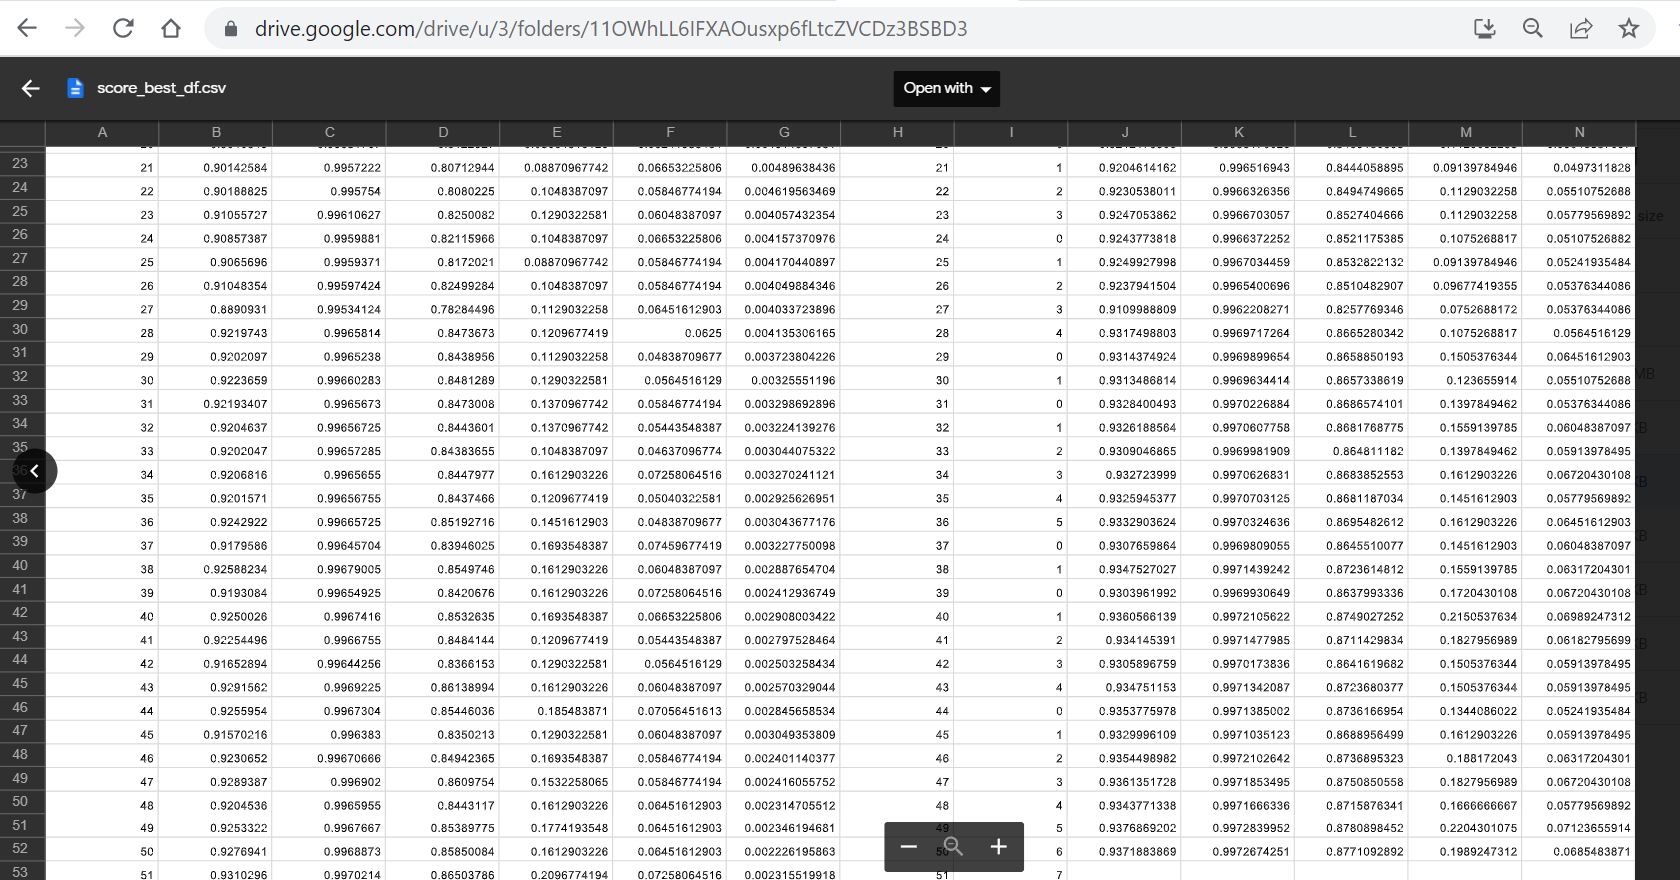